# Double Pendulum using Lagrange's Equation

## Euler-Lagrange equation

For a double pendulum (with parameters as outlined in Taylor 11.4), the total potential energy is given by

$$\begin{align*}
    U(\phi_1, \phi_2) &= (m_1 + m_2) g L_1 (1 - \cos \phi_1) + m_2 g L_2 (1 - \cos \phi_2) 
\end{align*}$$

and the total kinetic energy is given by

$$\begin{align*}
    T = \frac{1}{2}(m_1 + m_2)L_1^2 \dot \phi_1^2 + m_2 L_1 L_2 \dot \phi_1 \dot \phi_2 \cos(\phi_1 - \phi_2) + \frac{1}{2} m_2 L_2^2 \dot \phi_2^2
\end{align*}$$

The Lagrangian with generalized coordinates $\phi_1$ and $\phi_2$ is given by $\mathcal{L} = T - U(\phi_1, \phi_2)$. The two resulting Euler-Lagrange equations are given by

$$\begin{align*}
    \frac{d}{dt}\frac{\partial \mathcal{L}}{\partial \dot \phi_1} &= \frac{\partial \mathcal{L}}{\partial \phi_1} \\
    \frac{d}{dt}\frac{\partial \mathcal{L}}{\partial \dot \phi_2} &= \frac{\partial \mathcal{L}}{\partial \phi_2}  
\end{align*}$$

Explicitly computing $\mathcal{L}$ and writing down the Euler-Lagrange equations, one gets

$$\begin{align*}
    -(m_1 + m_2)g L_1 \sin \phi_1 - m_2 L_1 L_2 \dot \phi_1 \dot \phi_2 \sin(\phi_1 - \phi_2) &= (m_1 + m_2) L_1^2 \ddot \phi_1 + m_2 L_1 L_2 \ddot \phi_2 \cos(\phi_1 - \phi_2) - m_2 L_1 L_2(\dot \phi_1 - \dot \phi_2) \dot \phi_2 \sin(\phi_1 - \phi_2) \\
    -m_2 g L_2 \sin \phi_2 + m_2 L_1 L_2 \dot \phi_1 \dot \phi_2 \sin(\phi_1 - \phi_2) &= m_2 L_2^2 \ddot \phi_2 + m_2 L_1 L_2 \ddot \phi_1 \cos(\phi_1 - \phi_2) - m_2 L_1 L_2(\dot \phi_1 - \dot \phi_2) \dot \phi_1 \sin(\phi_1 - \phi_2) \\
\end{align*}$$

Our goal now is to get expressions for $\ddot \phi_1$ and $\ddot \phi_2$ which are independent of the other quantity. In order to do this, we can do a little more algebra and rewriting our system in matrix form as follows:

$$\begin{align*}
    \begin{pmatrix} 
        -(m_1 + m_2) g \sin \phi_1 - m_2 L_2 \dot \phi_2^2 \sin (\phi_1 - \phi_2)\\
        -m_2 g \sin \phi_2 + m_2 L_1 \dot \phi_1 ^2 \sin(\phi_1 - \phi_2) 
    \end{pmatrix} = 
    \begin{pmatrix} 
        (m_1 + m_2) L_1 & m_2 L_2 \cos(\phi_1 - \phi_2) \\
        m_2 L_1 \cos(\phi_1 - \phi_2) & m_2 L_2
    \end{pmatrix}
    \begin{pmatrix}
        \ddot \phi_1 \\ \ddot \phi_2 
    \end{pmatrix}
\end{align*}$$

Our goal is to evaluate this system numerically. Since solve_ivp can only solve systems of ordinary differential equations, let us reduce the system of two second-order differential equations into a system of four first-order differential equations. We begin by making the substitutions $q_1 = \dot \phi_1$ and $q_2 = \dot \phi_2$. Then, our matrix equation can be rewritten as

$$\begin{align*}
    \begin{pmatrix} 
        -(m_1 + m_2) g \sin \phi_1 - m_2 L_2 q_2^2 \sin (\phi_1 - \phi_2)\\
        -m_2 g \sin \phi_2 + m_2 L_1 q_1 ^2 \sin(\phi_1 - \phi_2) 
    \end{pmatrix} = 
    \begin{pmatrix} 
        (m_1 + m_2) L_1 & m_2 L_2 \cos(\phi_1 - \phi_2) \\
        m_2 L_1 \cos(\phi_1 - \phi_2) & m_2 L_2
    \end{pmatrix}
    \begin{pmatrix}
        \dot q_1 \\ \dot q_2 
    \end{pmatrix}
\end{align*}$$
    
We have an expression of the form $\mathbf{r} = M \mathbf{\dot q}$, where $M$, $\mathbf{\dot q}$, and $\mathbf{r}$ are the analogous matrices and vectors in the above expression. A quick computation tells us that 
$$\begin{align*}
    \det(M) = L_1 L_2 m_2(m_1 + m_2 - m_2 \cos^2(\phi_1 - \phi_2)) = L_1 L_2 m_2(m_1 + m_2 \sin^2(\phi_1 - \phi_2))
\end{align*}$$

and furthermore,
$$\begin{align}
    \begin{pmatrix} \dot q_1 \\ \dot q_2 \end{pmatrix} = 
    \frac{1}{\det(M)} 
    \begin{pmatrix} 
        m_2 L_2 & -m_2 L_2 \cos(\phi_1 - \phi_2) \\
        -m_2 L_1 \cos(\phi_1 - \phi_2) &  (m_1 + m_2) L_1 
    \end{pmatrix}
    \begin{pmatrix} 
        -(m_1 + m_2) g \sin \phi_1 - m_2 L_2 q_2^2 \sin (\phi_1 - \phi_2)\\
        -m_2 g \sin \phi_2 + m_2 L_1 q_1 ^2 \sin(\phi_1 - \phi_2) 
    \end{pmatrix}
\end{align}$$

This expression in conjunction to the substitutions we made for $\dot \phi_1$ and $\dot \phi_2$ will suffice to use solve_ivp to solve for the motion of the double pendulum. 

In [6]:
%matplotlib inline

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [8]:
# Adjust dpi
plt.rcParams['figure.dpi'] = 100.    # Default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 12
plt.rcParams.update({'font.size': font_size})

## Double Pendulum Class and Utility Functions

In [32]:
class DoublePendulum():
    """
    DoublePendulum class implements the parameters and Lagrange's equations for 
     a double pendulum.
     
    Parameters
    ----------
    m_1 : float
        mass of the first pendulum bob
    m_2 : float
        mass of the second pendulum bob
    L_1 : float
        length of the rod suspending m_1
    L_2 : float
        length of the rod connecting m_1 and m_2
    g : float
        gravitational acceleration at the earth's surface 
    """

    """
    Methods
    -------
    """
    def __init__(self, m_1 = 1., m_2 = 1., L_1 = 1., L_2 = 1., \
                 g = 1.):
        self.m_1 = m_1
        self.m_2 = m_2
        self.L_1 = L_1
        self.L_2 = L_2
        self.g = g
    

    """
    dy_dt(t, y)
    Returns the right side of the differential equation in vector y, 
    given time t and the corresponding value of y.
    """
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with 
                y[0] = phi_1(t) and y[1] = phi_1_dot(t) = q_1,
                y[2] = phi_2(t) and y[3] = phi_2_dot(t) = q_2
            
        Returns
        -------
        
        """
        phi_1, q_1, phi_2, q_2 = y

        # Compute all the matrix elements in equation (1)
        det = self.L_1 * self.L_2 * self.m_2 * (self.m_1 + self.m_2 \
                                                * np.sin(phi_1 - phi_2)**2)

        M_11 = self.m_2 * self.L_2
        M_12 = -self.m_2 * self.L_2 * np.cos(phi_1 - phi_2)
        M_21 = -self.m_2 * self.L_1 * np.cos(phi_1 - phi_2)
        M_22 = (self.m_1 + self.m_2) * self.L_1
        
        r_1 = (-self.m_1 - self.m_2) * self.g * np.sin(phi_1) \
            - self.m_2 * self.L_2 * q_2**2 * np.sin(phi_1 - phi_2)
        r_2 = -self.m_2 * self.g * np.sin(phi_2) \
            + self.m_2 * self.L_1 * q_1**2 * np.sin(phi_1 - phi_2)

        # get RHS of system by considering substitutions and matrix multiplications.
        phi_1_dot = q_1
        phi_1_ddot = (M_11 * r_1 + M_12 * r_2) / det
        phi_2_dot = q_2
        phi_2_ddot = (M_21 * r_1 + M_22 * r_2) / det

        return phi_1_dot, phi_1_ddot, phi_2_dot, phi_2_ddot
    

    def solve_ode(self, t_pts, phi_1_0, phi_1_dot_0, phi_2_0,
                phi_2_dot_0, abserr=1.0e-12, relerr=1.0e-12):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi_1, phi_1_dot, phi_2, phi_2_dot = solution.y

        return phi_1, phi_1_dot, phi_2, phi_2_dot

In [33]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [34]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make a simple double pendulum plot

In [35]:
# Common plotting time
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end + delta_t, delta_t)

# Some generic parameters
m_1 = 1.
m_2 = 1.
L_1 = 1.
L_2 = 1. 
g = 1.

# Instantiate a double pendulum
dp1 = DoublePendulum(m_1 = m_1, m_2 = m_2, L_1 = L_1, L_2 = L_2, g = g)

(<AxesSubplot:xlabel='$t$', ylabel='$\\phi(t)$'>,
 <matplotlib.lines.Line2D at 0x2997d99a380>)

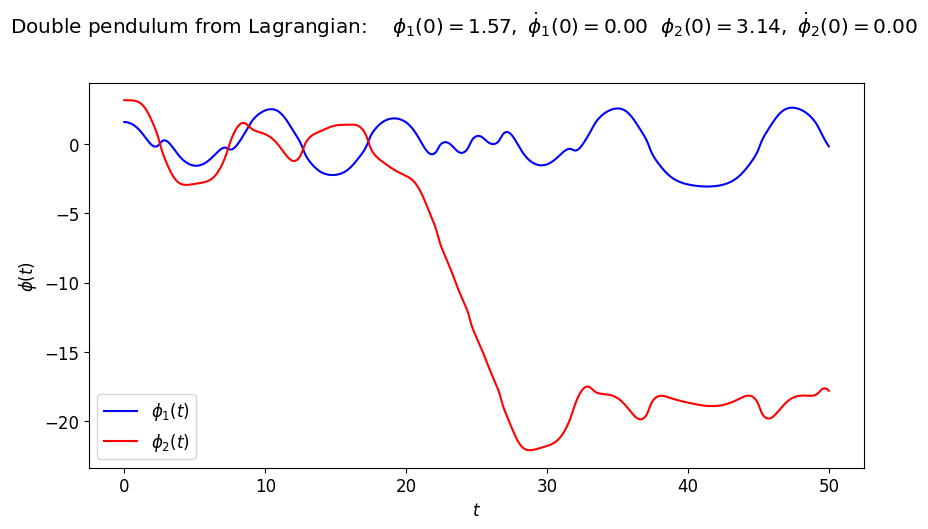

In [36]:
phi_1_0 = np.pi/2.
phi_1_dot_0 = 0.
phi_2_0 = np.pi
phi_2_dot_0 = 0.

phi_1, phi_1_dot, phi_2, phi_2_dot = dp1.solve_ode(t_pts, phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0)

# Labels for individual plot axes
phi_vs_time = (r'$t$', r'$\phi(t)$')

fig = plt.figure(figsize = (10, 5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf'  $\phi_1(0) = {phi_1_0:.2f},$' + \
                rf' $\dot\phi_1(0) = {phi_1_dot_0:.2f}$' + \
                rf'  $\phi_2(0) = {phi_2_0:.2f},$' + \
                rf' $\dot\phi_2(0) = {phi_2_dot_0:.2f}$' 
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)
start, stop = start_stop_indices(t_pts, t_start, t_end)

plot_y_vs_x(t_pts[start : stop], phi_1[start : stop], 
            axis_labels = phi_vs_time,
            color = 'blue', 
            label = r'$\phi_1(t)$', 
            ax = ax_a)

plot_y_vs_x(t_pts[start : stop], phi_2[start : stop], 
            axis_labels = phi_vs_time,
            color = 'red', 
            label = r'$\phi_2(t)$', 
            ax = ax_a)

## Demonstration of Chaos

We can show that the system is chaotic for initial conditions beyond the small angle approximation by instantiating a double pendulum and then solving the equations of motion in each case. Then, we can plot $|\Delta \phi_1|$ and $|\Delta \phi_2|$ to see the sensitivity to initial conditions.

In [ ]:
# Common plotting time
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end + delta_t, delta_t)

m_1 = 1.
m_2 = 1.
L_1 = 1.
L_2 = 1. 
g = 1.

# Instantiate a double pendulum
dp1 = DoublePendulum(m_1 = m_1, m_2 = m_2, L_1 = L_1, L_2 = L_2, g = g)

Text(0, 0.5, '$|\\Delta\\phi|$')

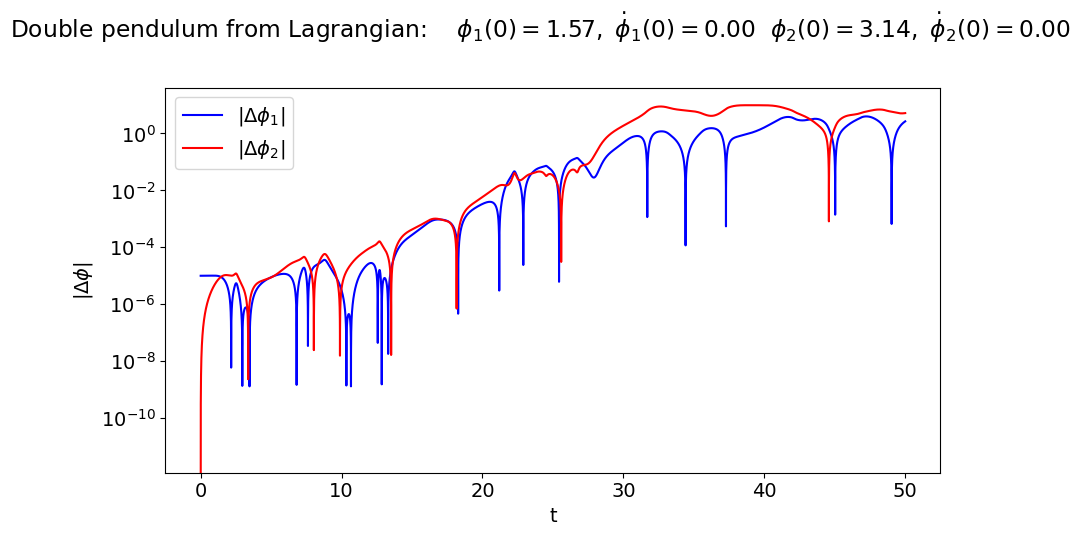

In [54]:
phi_1_0_1 = np.pi/2.
phi_1_dot_0_1 = 0.
phi_2_0_1 = np.pi
phi_2_dot_0_1 = 0.

phi_1_1, phi_1_dot_1, phi_2_1, phi_2_dot_1 = dp1.solve_ode(t_pts, phi_1_0_1, phi_1_dot_0_1, phi_2_0_1, phi_2_dot_0_1)

phi_1_0_2 = np.pi/2. - 0.00001 # initial conditions just 0.00001 radians apart
phi_1_dot_0_2 = 0.
phi_2_0_2 = np.pi 
phi_2_dot_0_2 = 0.

phi_1_2, phi_1_dot_2, phi_2_2, phi_2_dot_2 = dp1.solve_ode(t_pts, phi_1_0_2, phi_1_dot_0_2, phi_2_0_2, phi_2_dot_0_2)

Delta_phi_1 = np.fabs(phi_1_2 - phi_1_1)
Delta_phi_2 = np.fabs(phi_2_2 - phi_2_1)

# Labels for individual plot axes
D_phi_vs_time = (r'$t$', r'$|\Delta \phi|$')

fig = plt.figure(figsize=(10, 5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf'  $\phi_1(0) = {phi_1_0_1:.2f},$' + \
                rf' $\dot\phi_1(0) = {phi_1_dot_0_1:.2f}$' + \
                rf'  $\phi_2(0) = {phi_2_0_1:.2f},$' + \
                rf' $\dot\phi_2(0) = {phi_2_dot_0_1:.2f}$' 
fig.suptitle(overall_title, va='baseline')
    

ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, 0., 50.)

plot_y_vs_x(t_pts[start : stop], Delta_phi_1[start : stop], 
            axis_labels = D_phi_vs_time,
            color = 'blue', 
            label = r'$|\Delta\phi_1|$', 
            ax = ax_a, 
            semilogy = True)

plot_y_vs_x(t_pts[start : stop], Delta_phi_2[start : stop], 
            axis_labels = D_phi_vs_time,
            color = 'red', 
            label = r'$|\Delta \phi_2|$', 
            ax = ax_a, 
            semilogy = True)
ax_a.set_xlabel('t')
ax_a.set_ylabel(r'$|\Delta\phi|$')

Note that $|\Delta \phi_1|$ and $|\Delta \phi_2|$ increase exponentially with respect to $\tau$. That is, $|\Delta \phi(t)| \sim K e^{\lambda t}$ where $\lambda > 0$. A positive Lyapunov exponent $\lambda$ is indicative of a chaotic regime. 